In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/heart-disease-data


In [49]:
import os

# Since the downloaded content is a directory, we need to find the csv file inside it.
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.csv'):
            file_path = os.path.join(dirname, filename)
            break

df = pd.read_csv(file_path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [50]:
# Fill missing values in numerical columns with the mean
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing values in categorical columns with the mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.6+ KB


/tmp/ipython-input-1463711827.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1463711827.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

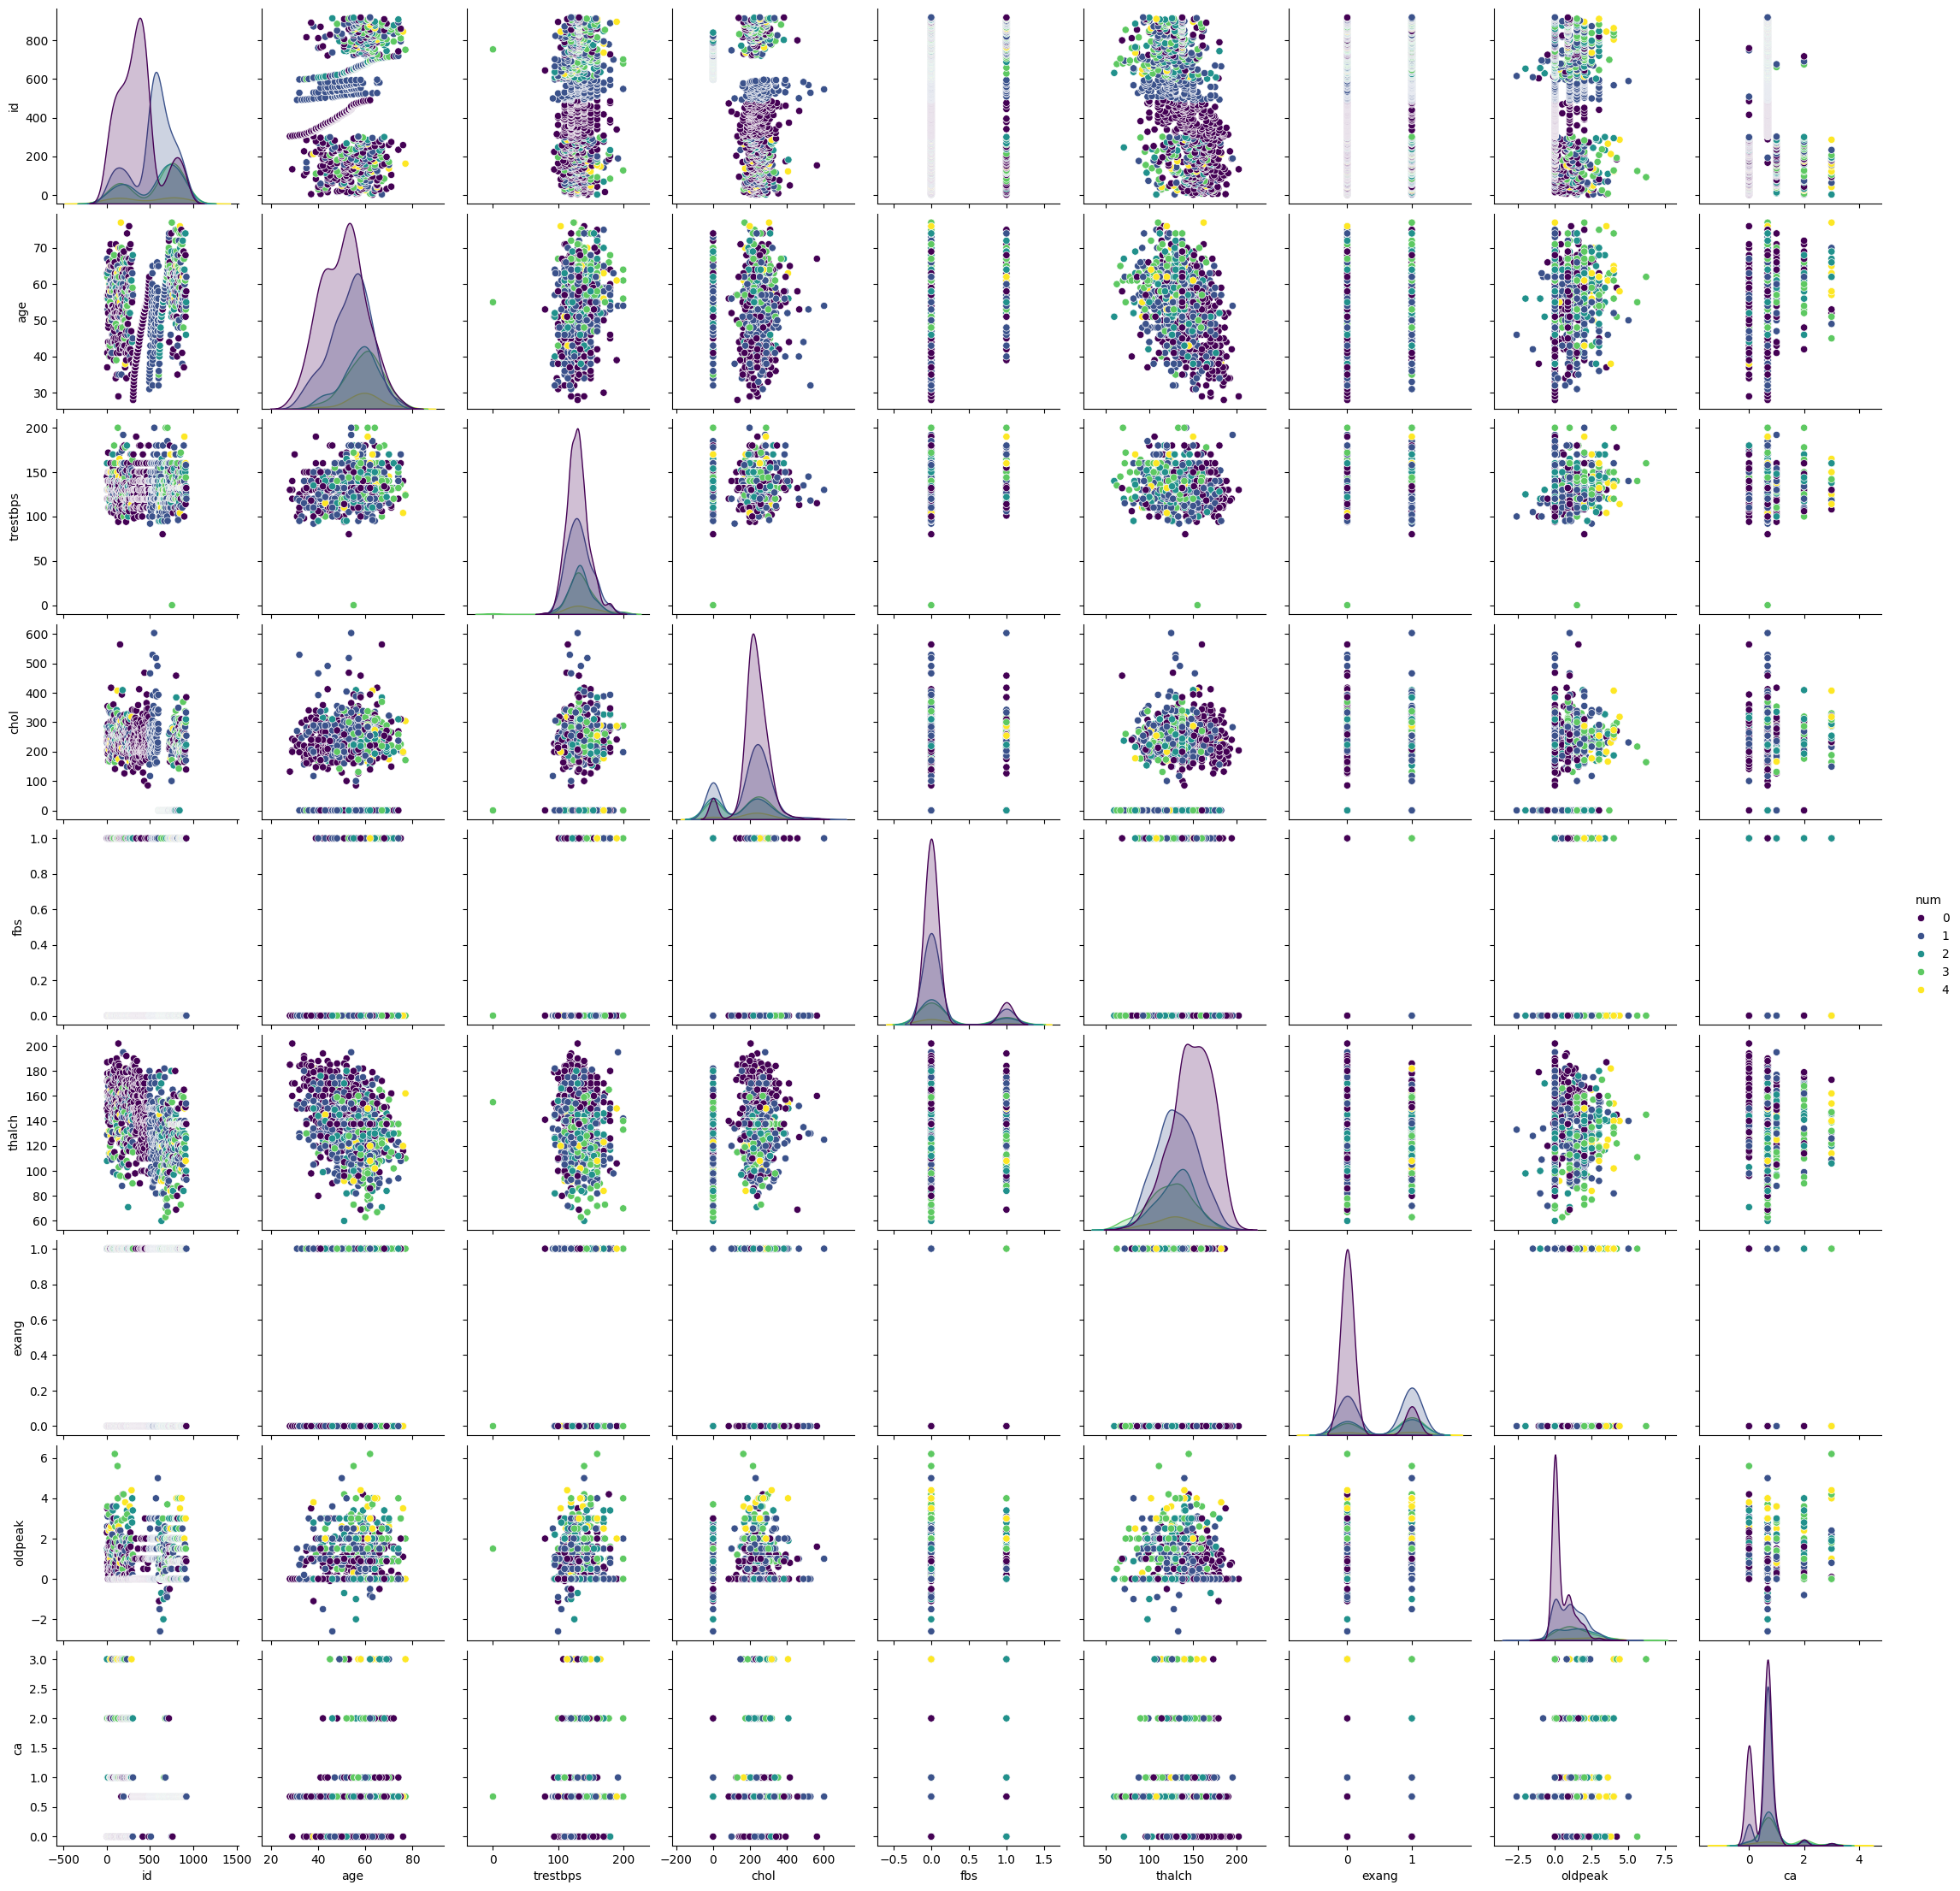

In [51]:
# Create a pairplot to visualize the relationships between the numerical features
sns.pairplot(df, hue='num', palette='viridis')
plt.show()

In [52]:
df.drop(['id', 'ca', 'slope', 'thal'], axis=1, inplace=True)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [53]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original one
df_encoded = df.copy()

# Apply label encoding to each categorical column
for col in df_encoded.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,0


In [54]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the encoded dataframe
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

df_scaled.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,0.714286,1.0,0.0,1.000000,0.725,0.386401,1.0,0.0,0.633803,0.0,0.556818,0.00
1,0.795918,1.0,0.0,0.000000,0.800,0.474295,0.0,0.0,0.338028,1.0,0.465909,0.50
2,0.795918,1.0,0.0,0.000000,0.600,0.379768,0.0,0.0,0.485915,1.0,0.590909,0.25
3,0.183673,1.0,0.0,0.666667,0.650,0.414594,0.0,0.5,0.894366,0.0,0.693182,0.00
4,0.265306,0.0,0.0,0.333333,0.650,0.338308,0.0,0.0,0.788732,0.0,0.454545,0.00


In [55]:
from imblearn.over_sampling import SMOTE

# Separate the features (X) and the target (y)
X = df_scaled.drop('num', axis=1)
y = df_encoded['num']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
y_resampled.value_counts()

,count
num,
0,411
2,411
1,411
3,411
4,411


In [56]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Decision Tree Accuracy: 0.7518248175182481

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.71        85
           1       0.68      0.57      0.62        81
           2       0.71      0.82      0.76        72
           3       0.77      0.76      0.77        84
           4       0.89      0.89      0.89        89

    accuracy                           0.75       411
   macro avg       0.75      0.75      0.75       411
weighted avg       0.75      0.75      0.75       411



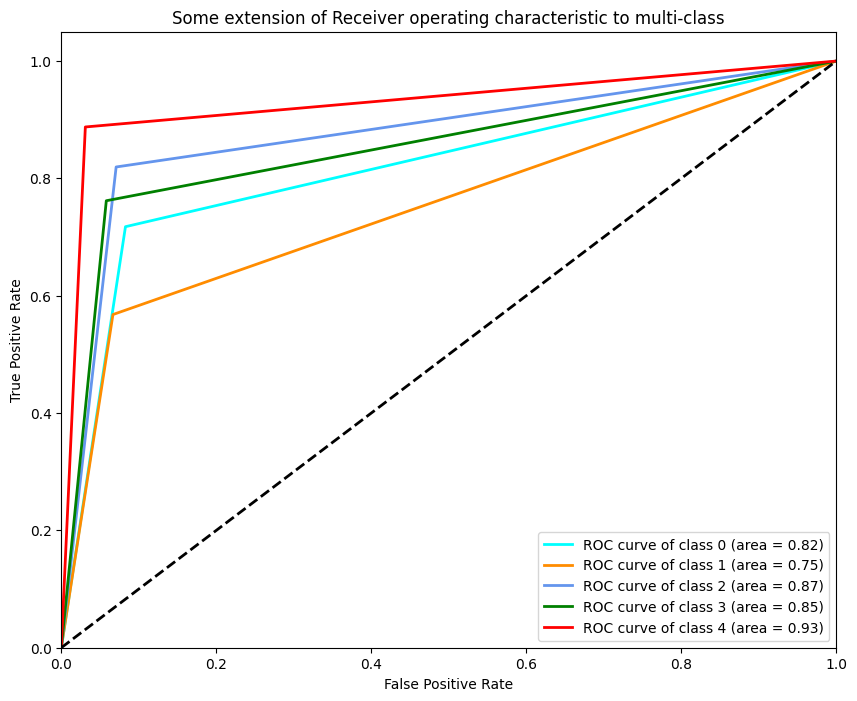

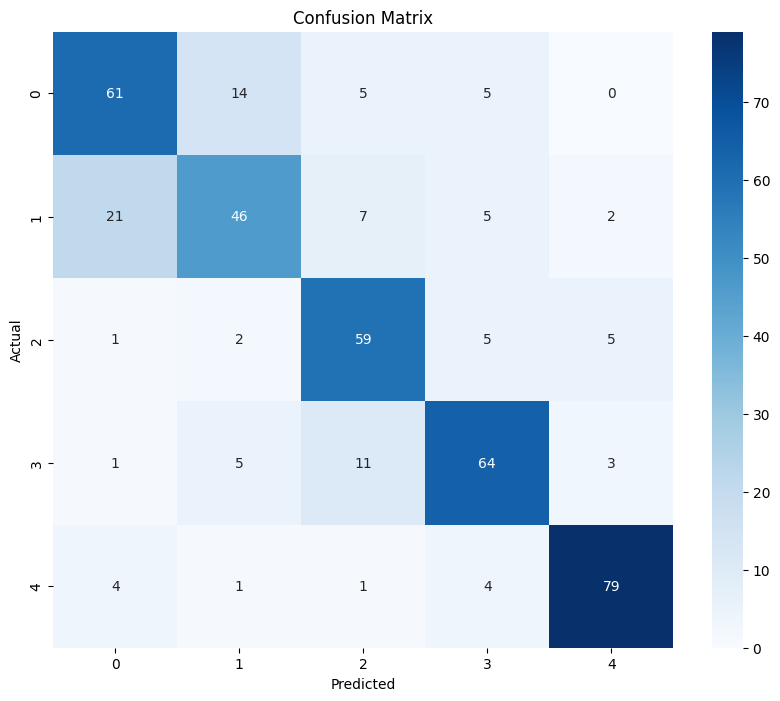

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtc = dtc.predict(X_test)

# Evaluate the model's performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dtc))

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_score = dtc.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dtc)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Logistic Regression Accuracy: 0.4768856447688564

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.82      0.68        85
           1       0.42      0.35      0.38        81
           2       0.29      0.21      0.24        72
           3       0.38      0.35      0.36        84
           4       0.56      0.61      0.58        89

    accuracy                           0.48       411
   macro avg       0.45      0.47      0.45       411
weighted avg       0.45      0.48      0.46       411



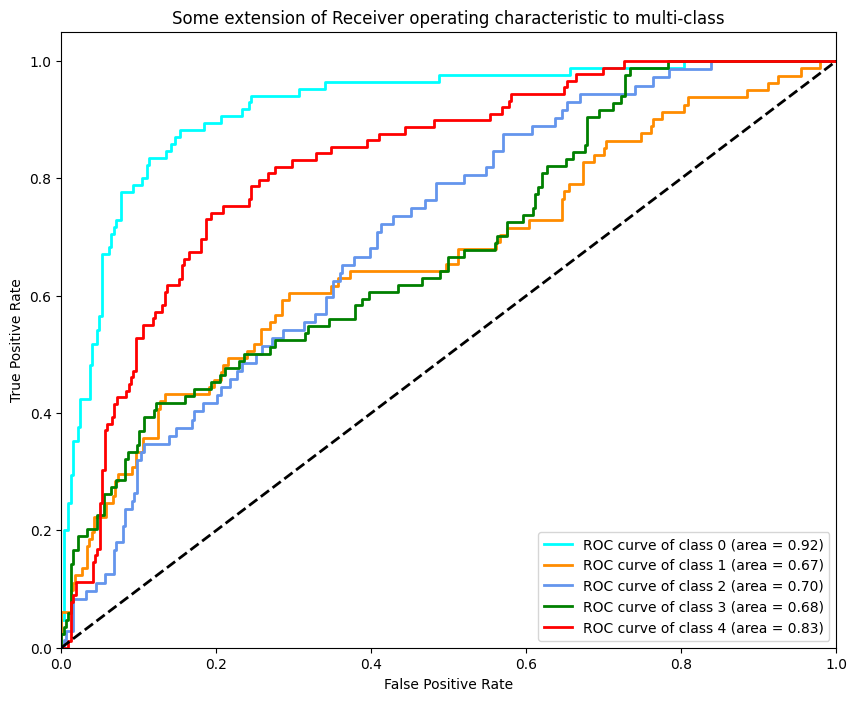

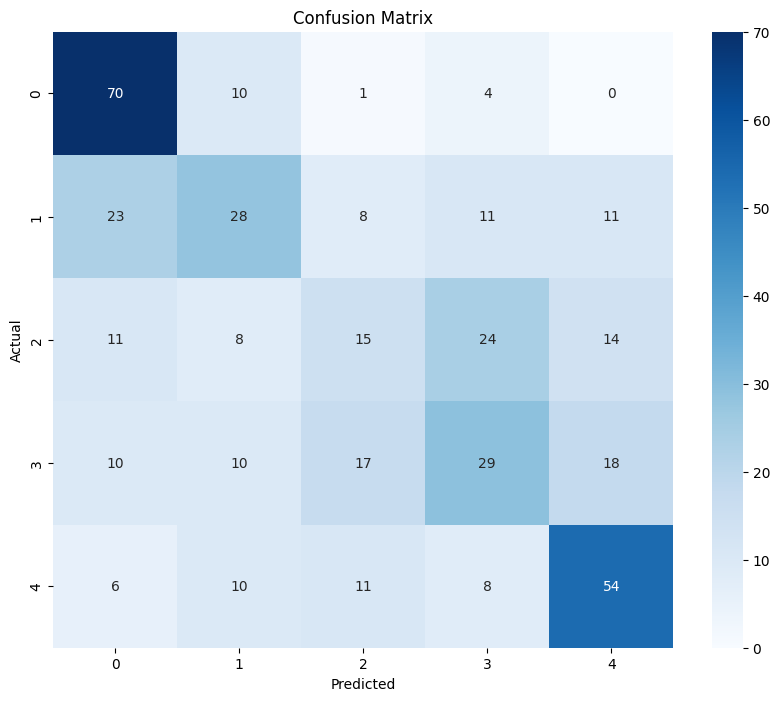

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model's performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_score = lr.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()